In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import SimpleExpSmoothing
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('../Datasets/AMD Historical Data.csv', header=0, index_col=0)

In [20]:
df = df[['Open']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [21]:
# Train the SES model and tune alpha using the validation dataset
best_alpha = None
best_mse = np.inf
for alpha in np.arange(0.1, 1.0, 0.1):
    model = SimpleExpSmoothing(train_data['Open']).fit(smoothing_level=alpha, optimized=False)
    y_pred = model.forecast(len(val_data))
    mse = mean_squared_error(val_data['Open'], y_pred)
    if mse < best_mse:
        best_mse = mse
        best_alpha = alpha

print("Best alpha value:", best_alpha)

Best alpha value: 0.1


In [23]:
model = SimpleExpSmoothing(train_data['Open']).fit(smoothing_level=best_alpha, optimized=False)

In [24]:
# Evaluate the model using the test dataset
y_pred = model.forecast(len(test_data))
mse = mean_squared_error(test_data['Open'], y_pred)
print(f"Test MSE: {mse:.2f}")

Test MSE: 1079.18


In [7]:
# Make predictions for the next 30 values
next_30 = model.forecast(30)
print(next_30)

1127    84.325334
1128    84.325334
1129    84.325334
1130    84.325334
1131    84.325334
1132    84.325334
1133    84.325334
1134    84.325334
1135    84.325334
1136    84.325334
1137    84.325334
1138    84.325334
1139    84.325334
1140    84.325334
1141    84.325334
1142    84.325334
1143    84.325334
1144    84.325334
1145    84.325334
1146    84.325334
1147    84.325334
1148    84.325334
1149    84.325334
1150    84.325334
1151    84.325334
1152    84.325334
1153    84.325334
1154    84.325334
1155    84.325334
1156    84.325334
dtype: float64


In [25]:
# Fit SES model to training and validation data with best alpha value
model = SimpleExpSmoothing(pd.concat([train_data['Open'], val_data['Open']])).fit(smoothing_level=best_alpha)

# Predict next 322 days (i.e., the length of the test set)
predictions = model.forecast(len(test_data))

# Evaluate model performance on test set
mse = mean_squared_error(test_data['Open'], predictions)
print("Mean squared error:", mse)

Mean squared error: 477.72918244777037


C:\Users\dinht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dinht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [46]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
next_30_days = model.predict(len(x_next_30_days))
print('Predicted closing prices for the next 30 days:')
print(next_30_days)

Predicted closing prices for the next 30 days:
30       12.282349
31       12.374114
32       12.461703
33       12.494533
34       12.586079
           ...    
1606     95.434612
1607     96.359151
1608     97.448236
1609     98.301412
1610    100.202271
Length: 1259, dtype: float64


In [55]:
next_1_days = model.forecast(30)
print(next_1_days)

1289    102.428044
1290    102.428044
1291    102.428044
1292    102.428044
1293    102.428044
1294    102.428044
1295    102.428044
1296    102.428044
1297    102.428044
1298    102.428044
1299    102.428044
1300    102.428044
1301    102.428044
1302    102.428044
1303    102.428044
1304    102.428044
1305    102.428044
1306    102.428044
1307    102.428044
1308    102.428044
1309    102.428044
1310    102.428044
1311    102.428044
1312    102.428044
1313    102.428044
1314    102.428044
1315    102.428044
1316    102.428044
1317    102.428044
1318    102.428044
dtype: float64


C:\Users\dinht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


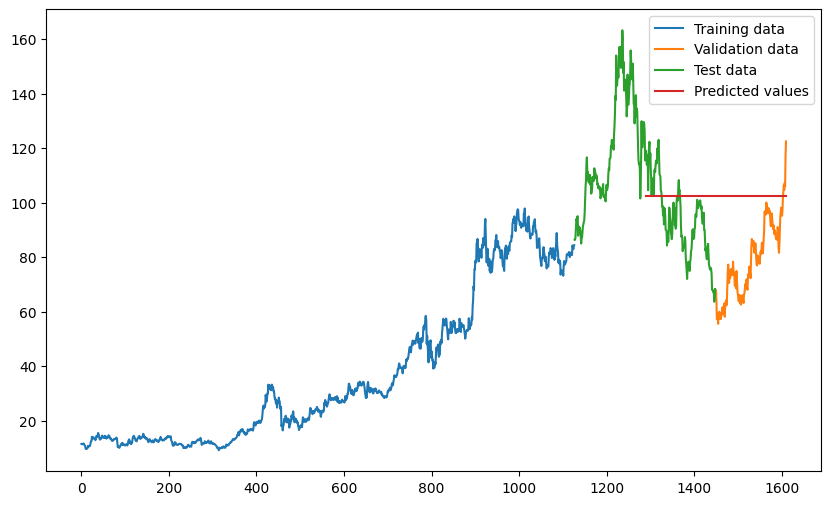

In [59]:
# Plot predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Open'], label='Training data')
plt.plot(val_data.index, val_data['Open'], label='Validation data')
plt.plot(test_data.index, test_data['Open'], label='Test data')
# plt.plot(last_data,next_30_days)
plt.plot(predictions.index, predictions, label='Predicted values')
# plt.plot(x_next_30_days.flatten(),next_30_days.values.ravel(), label='Predicted values for the next 30 days')
plt.legend()
plt.show()

C:\Users\dinht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dinht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


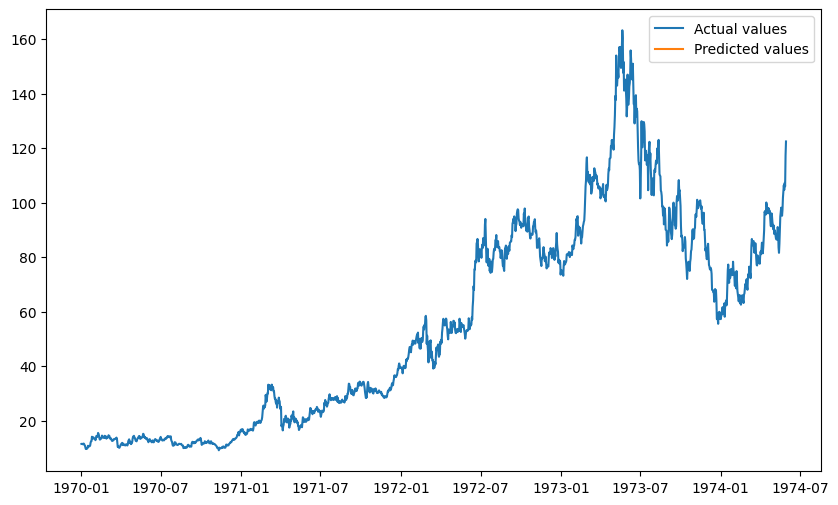

In [27]:
# Fit SES model to training and validation data with best alpha value
model = SimpleExpSmoothing(pd.concat([train_data['Open'], val_data['Open']])).fit(smoothing_level=best_alpha)

# Predict next 30 days after the last day in the dataset
last_date = df.index[-1]
idx = pd.date_range(last_date, periods=30, freq='D')[1:]
predictions = pd.Series(model.forecast(30), index=idx)

# Combine actual and predicted values
combined_df = pd.concat([df['Open'], predictions])

# Plot actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Open'], label='Actual values')
plt.plot(predictions.index, predictions, label='Predicted values')
plt.legend()
plt.show()